# Assignment 1
### Due date: Monday, October 2, 2017

Name: Dong, Larry <br/>
Student ID: 2606 47775

The following code uses Python3. This file is written using the IPython Juypter notebook.

In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

% matplotlib inline

## 1.
### a)
To approximate $\pi$ to 4 decimal places, we need to know $\pi$ to 4 decimal places as well. See code below. Indeed, 3 decimals is not sufficient.

In [2]:
# 1.a) Using somewhat brute force

print("Real value of pi (up to 15 decimal places): ", np.pi)
print("Real value of its square root (up to 15 decimal places): ", np.sqrt(np.pi))
print("   • truncated to 4 decimal places: ", np.trunc(np.sqrt(np.pi)*(1e4))*(1e-4))
print("   • rounded to 4 decimal places  : ", np.round(np.sqrt(np.pi), decimals=4))
print("")
print("3 decimal pi (truncated): 3.141, its square root: ", np.sqrt(3.141), "≈ ", np.trunc(np.sqrt(3.141)*(1e4))*(1e-4))
print("3 decimal pi (rounded): 3.142, its square root  : ", np.sqrt(3.142), "≈ ", np.round(np.sqrt(3.142), decimals=4))
print("")
print("4 decimal pi (truncated): 3.1415, its square root: ", np.sqrt(3.1415), "≈ ",np.trunc(np.sqrt(3.1415)*(1e4))*(1e-4))
print("4 decimal pi (rounded): 3.1416, its square root  : ", np.sqrt(3.1416), "≈ ", np.round(np.sqrt(3.1416), decimals=4))

Real value of pi (up to 15 decimal places):  3.141592653589793
Real value of its square root (up to 15 decimal places):  1.77245385091
   • truncated to 4 decimal places:  1.7724
   • rounded to 4 decimal places  :  1.7725

3 decimal pi (truncated): 3.141, its square root:  1.77228665853 ≈  1.7722
3 decimal pi (rounded): 3.142, its square root  :  1.77256875748 ≈  1.7726

4 decimal pi (truncated): 3.1415, its square root:  1.77242771362 ≈  1.7724
4 decimal pi (rounded): 3.1416, its square root  :  1.77245592329 ≈  1.7725


### b)

In [3]:
# 1.b)

num1a = "11.101101"

def convert_binary(num): # num is of type str, assuming all digit are either 0 or 1
    point = "."
    index_point = -1
    num_base_10 = 0
    if point in num:
        index_point = num.index(point)
        
    index_point_for = index_point
    for i in range(len(num)):
        if i == index_point:
            index_point_for += 1
        else:
            if num1a[i] == "0":
                pass
            else: # == "1"
                num_base_10 += 2**(-i + index_point_for - 1)
    
    return num_base_10

print("11.101101 in base 10: ", convert_binary(num1a))

11.101101 in base 10:  3.703125


## 2.
### i)
Observe that $f(x) = e^x + e^{-x} = \sum_{n=0}^\infty \big(\frac{x^n}{n!} - \frac{(-x)^n}{n!}\big) = 2 \cdot \sum_{n=0}^\infty \frac{x^{2n+1}}{(2n+1)!}$ since terms with even values of $n$ cancel out. The best way to approximate $f$ near zero is using Taylor series, since $0< \frac{x^{2n+1}}{(2n+1)!} << 1$ for large values of $n$ and for values of $x$ near $0$.

### ii)
For this problem, there is an asymptote at $x=0$. Observe that $f(x) = \frac{1}{\sqrt{1+x^2} - \sqrt{1-x^2}} = \frac{\sqrt{1+x^2} + \sqrt{1-x^2}}{1 + x^2 - (1 - x^2)} = \frac{\sqrt{1+x^2} + \sqrt{1-x^2}}{2x^2}$. Indeed, since $x \in [-1, 1]$ is bounded due to the restriction of $\sqrt{1 - x^2}$, it follows that the numerator is also bounded (from below): $\sqrt{1+x^2} + \sqrt{1-x^2} \geq \sqrt{1+x^2} \geq \sqrt{1} = 1$. Notice that for values of $x$ near 0, $\sqrt{1 + x^2} \approx = 1$ and $\sqrt{1 - x^2} \approx 1$. As a result, for values of $x$ arbitrarily near $0$, $f(x)$ can be approximated as follows:
$$
f(x) = \frac{1}{\sqrt{1+x^2} - \sqrt{1-x^2}}
= \frac{\sqrt{1+x^2} + \sqrt{1-x^2}}{2x^2}
\approx \frac{1 + 1}{2x^2} = \frac{1}{x^2}
$$

In [4]:
# 2 examples

values_to_be_tested = [-0.3, -0.045, -0.00176, -0.0000198, 0.0000328, 0.00563, 0.028]
# chosen somewhat at random

def func_2(x):
    return 1/(np.sqrt(1 + x**2) - np.sqrt(1 - x**2))

def func_2_est(x):
    return 1/x**2

for val in values_to_be_tested:
    print("x value: ", val)
    print("   f({}) = {}".format(val, func_2(val)))
    print("   estimation = ", func_2_est(val))

x value:  -0.3
   f(-0.3) = 11.099832512822221
   estimation =  11.11111111111111
x value:  -0.045
   f(-0.045) = 493.8269073685089
   estimation =  493.8271604938272
x value:  -0.00176
   f(-0.00176) = 322830.57851801655
   estimation =  322830.57851239666
x value:  -1.98e-05
   f(-1.98e-05) = 2550761134.799092
   estimation =  2550760126.517702
x value:  3.28e-05
   f(3.28e-05) = 929506269.8997598
   estimation =  929506246.2819752
x value:  0.00563
   f(0.00563) = 31548.826537484936
   estimation =  31548.826541396797
x value:  0.028
   f(0.028) = 1275.5101060816737
   estimation =  1275.5102040816325


One can observe that ```func_2_est(x)``` is doing well for values of $|x| << 0.1$ near $0$. As a result, it follows that $\frac{1}{x^2}$ approximates well $f(x)$ for values of $x \approx 0$.

In [5]:
# 3

def f(x):
    return np.sqrt(x) - np.exp(-x)

def secant(f, a, b, tolerance=1e-6/2): # f is the function to be approximated
    assert a < b # assume WLOG a < b
    
    increasing = False
    if f(b) > 0:
        increasing = True
        
    answer = (a + b)/2
    new_a = a
    new_b = b
    iterations = 0
    while (min(np.abs(answer - new_a), np.abs(answer - new_b))) > tolerance:
        if f(answer) > 0:
            if increasing:
                new_b = answer
                answer = (answer + new_a)/2
            else:
                new_a = answer
                answer = (answer + new_b)/2
        elif f(answer) < 0:
            if increasing:
                new_a = answer
                answer = (answer + new_b)/2
            else:
                new_b = answer
                answer = (answer + new_a)/2
        else: # f(answer) = 0 and should never reach here
            return answer

    return answer

print("Using secant method:  ", secant(f, -1000, 1000))

def newton_raphson(x, past_guess, tolerance=1e-6/2):
    # specific to the function for this problem, since derivative needs to be computed
    f_prime = 1/2/np.sqrt(x) + np.exp(-x)
    new_guess = x - f(x)/f_prime
    
    if np.abs(x - past_guess) < tolerance:
        return x # termination of algorithm
    else:
        return newton_raphson(new_guess, x)

print("Using Newton Raphson: ", newton_raphson(1, 0))
root_3 = opt.brentq(f, 0, 10)
print("True value of root: ", root_3)

Using secant method:   0.42630312964320183
Using Newton Raphson:  0.426302751007
True value of root:  0.4263027510073309


## 4.

Since the true value of the root is in the interval $[0, 1]$, $\ln(x_n)$ will diverge since $x_n$ will have very small values. The computations using the code below validate this arguments. As a result, it is best to use $x_{n+1} = \phi(x_n)= e^{-2x_n}$. In fact, $x_{n+1} = \frac{1}{2} \ln(x_n)$ will diverge.

In [6]:
# 4

# using f(x) as defined in the block of code above

def fixed_point(x, method, counter, num):
    # num is number of iterations, counter should be initialized at 0
    
    assert method in [1, 2]
    
    if num == 0:
        print("Termination after {} iterations.".format(counter))
        return x
    else:
        if method == 1:
            x_n_plus_1 = np.exp(-2*x)
        else: # method == 2
            x_n_plus_1 = -np.log(x)/2
        if counter % 5 == 0: # avoids too much printing
            print("Iteration {}: value = {}".format(counter, x_n_plus_1))
        return fixed_point(x_n_plus_1, method, counter+1, num-1)        

In [7]:
fixed_point(0, 1, 0, 20)
print("")
fixed_point(0, 2, 0, 20)

Iteration 0: value = 1.0
Iteration 5: value = 0.27399917336073404
Iteration 10: value = 0.5021515109541463
Iteration 15: value = 0.3942091816712422
Termination after 20 iterations.

Iteration 0: value = inf
Iteration 5: value = nan
Iteration 10: value = nan
Iteration 15: value = nan
Termination after 20 iterations.


/Users/Shamalama/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:17: RuntimeWarning: divide by zero encountered in log
/Users/Shamalama/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in log


nan

## 5.
Note that it seems that $\lambda \geq 0$. I tried using $\lambda$ values stricly less than 0, and it does not work. <br/>
As per my work below, having a value of lambda somewhere around $0.9$, more precisely somewhere between $0.85$ and $0.90$. However, according to my computations below, it seems that $\lambda_{opt} \approx 0.87485$. This is obtained using an initial guess of $x_0 = 0.5$.

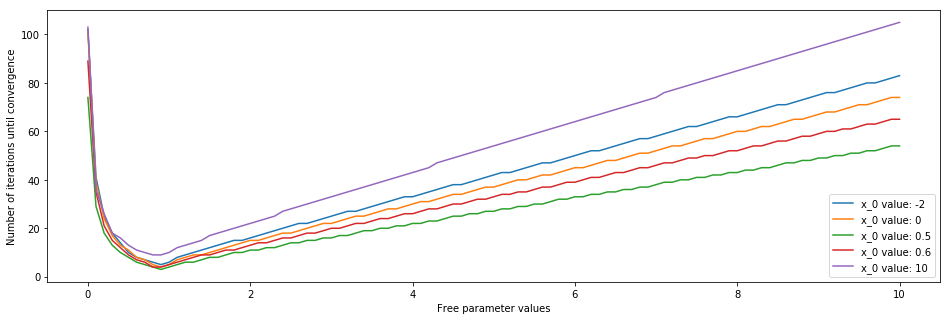

In [8]:
# 5

root_5 = opt.brentq(lambda x: 1 - x - np.sin(x), -10, 10) # approx. 0.51097

def phi(x_n, free_para, real_val, ith_iter, tolerance=1e-6/2): 
    if np.abs(x_n - real_val) < tolerance:
        return (x_n, ith_iter)
    else:
        x_n_plus_1 = (free_para*x_n + 1 - np.sin(x_n))/(1 + free_para)
        return phi(x_n_plus_1, free_para, real_val, ith_iter+1)
    
para_values = np.linspace(0, 10, num=101)
# will test 201 free parameter values
# [0, 0.1, 0.2, ..., 9.9, 10.0]

x_0 = [-2, 0, 0.5, 0.6, 10] # initial guess
dict_vals = {}

for init_val in x_0:
    num_iterations = []
    for para in para_values:
        num_iterations.append(phi(init_val, para, root_5, 0)[1])
    dict_vals[init_val] = num_iterations

fig = plt.figure(figsize=(16, 5))
for init_val in x_0:
    plt.plot(para_values, dict_vals[init_val])
plt.xlabel("Free parameter values")
plt.ylabel("Number of iterations until convergence")
plt.legend(["x_0 value: {}".format(x_i) for x_i in x_0])

In [9]:
for x_i in x_0:
    corr_indices = []
    for i in range(len(para_values)):
        if dict_vals[x_i][i] == min(dict_vals[x_i]):
            corr_indices.append(i)
    print("Minimum number of iterations for x_0 = {} :  {}".format(x_i ,min(dict_vals[x_i])))
    print("Corresponding lambda value(s): ", [para_values[idx] for idx in corr_indices])
    print("")

Minimum number of iterations for x_0 = -2 :  5
Corresponding lambda value(s):  [0.90000000000000002]

Minimum number of iterations for x_0 = 0 :  4
Corresponding lambda value(s):  [0.90000000000000002]

Minimum number of iterations for x_0 = 0.5 :  3
Corresponding lambda value(s):  [0.90000000000000002]

Minimum number of iterations for x_0 = 0.6 :  4
Corresponding lambda value(s):  [0.80000000000000004, 0.90000000000000002]

Minimum number of iterations for x_0 = 10 :  9
Corresponding lambda value(s):  [0.80000000000000004, 0.90000000000000002]



It seems that $\lambda_{opt}$ is somewhere around $0.9$.

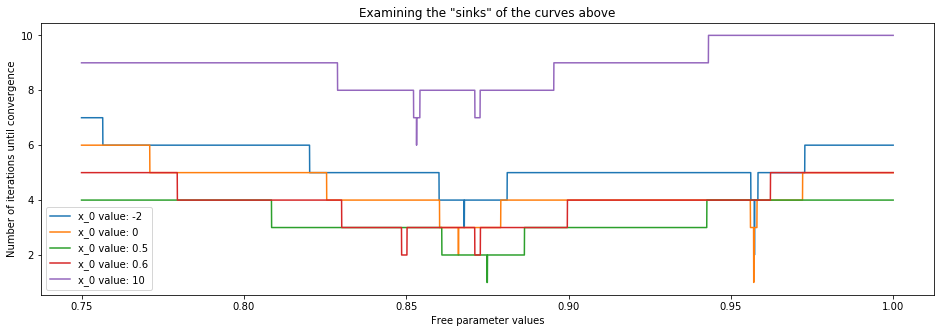

In [10]:
# using more precise lambda values

para_values_precise = np.linspace(0.75, 1, num=10001)

dict_vals_precise = {}

for init_val in x_0:
    num_iterations = []
    for para in para_values_precise:
        num_iterations.append(phi(init_val, para, root_5, 0)[1])
    dict_vals_precise[init_val] = num_iterations

fig = plt.figure(figsize=(16, 5))
for init_val in x_0:
    plt.plot(para_values_precise, dict_vals_precise[init_val])
plt.xlabel("Free parameter values")
plt.ylabel("Number of iterations until convergence")
plt.title("Examining the \"sinks\" of the curves above")
plt.legend(["x_0 value: {}".format(x_i) for x_i in x_0]) # same x_0's

The minimum seems to be between $0.85$ and $0.90$, since all curves seems to have a "sink" in that region.

In [11]:
min_num_iter = min(dict_vals_precise[0.5])
print("Minimum amount of iterations to find the value of the root within tolerance: ", min_num_iter)
opt_para = para_values_precise[dict_vals_precise[0.5].index(min_num_iter)]
print("Optimal parameter: ", para_values_precise[dict_vals_precise[0.5].index(min_num_iter)])
print("Root (to 6 decimals): ", np.around(phi(0.5, opt_para, root_5, 0)[0], decimals=6))

Minimum amount of iterations to find the value of the root within tolerance:  1
Optimal parameter:  0.87485
Root (to 6 decimals):  0.510974
